# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [8]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [6]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [9]:
data_dump=data[['race','call']]

In [57]:
data_dump.head()

,race,call
0,w,0.0
1,w,0.0
2,b,0.0
3,b,0.0
4,w,0.0


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

#### 1. What test is appropriate for this problem? Does CLT apply?

##### [ANS] Hypothesis test is appropriate for the problem.  
##### Check 3 prerequisit of CLT: (1) Randomness: The white or black names on the resumes are "randomly" assigned, as in description. So it satisfies the random requirement.
##### (2) Normal distribution: There were no description of the population distribution, but the sampling size is 157 and 235 for black and white (been called). Both sizes are >> 30 . So the distribution should be roughly normal.
##### (3) Independance: The sampling is likely not with replacement, but since to total population of job seeker(who has been called) must be way larger than 10* (157+235), we can say that the samples are independent.

#### 2.What are the null and alternate hypotheses?

In [36]:
p_wcall = sum(data_dump[data_dump.race=='w'].call)/len(data_dump[data_dump.race=='w'])
p_bcall = sum(data_dump[data_dump.race=='b'].call)/len(data_dump[data_dump.race=='b'])
print "proportion of white candidates called:", p_wcall
print "proportion of black candidates called:", p_bcall
print "difference :", p_wcall-p_bcall

proportion of white candidates called: 0.0965092402464
proportion of black candidates called: 0.064476386037
difference : 0.0320328542094


##### We want to know,  that the proportion of black candidates getting called, are not the same as white, this is not due to chance. 
##### Null hypothesis H0: The higher proportion of white candidates getting called is due to chance. That the proportion of white and black people getting calls are identical. P(white | called ) =P(black | called). That is , P(white | called)-P(black | called) =0
##### Alternative hypothesis H1: P(white | called) != P(black | called), that is P(white | called) - P(black | called) != 0
##### Use a two-tailed z-test, since we can approximate population standard deviation by sample variances.
##### Setting confidence level = 95%

In [14]:
w = data_dump[data.race=='w']
b = data_dump[data.race=='b']

#### 3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

In [46]:
## frequentist approach: calculate margin of error
## based on H0, p_diff = 0
std_w = np.sqrt(p_wcall*(1-p_wcall)) ## Standard Deviation of white candidate(based on benoulli distribution)
std_b = np.sqrt(p_bcall*((1-p_bcall)))##                       black 
std_diff = np.sqrt((std_w**2)/float(len(w))+(std_b**2)/float(len(b))) ## Standard Deviation of the difference between black and white
## for the significant level 95%, the z* valule is : 1.96
z_crit_val = 1.96

MOE = z_crit_val*std_diff   # margin of error
p_diff = p_wcall-p_bcall
print "Margin of error is :", MOE
print "Confidence interval for the difference between proportion of the white and the black :", 0-MOE, "to", 0+MOE

z_stat = (p_diff-0)/std_diff
print "z statistic = ", z_stat
### according to t-table , t=3.94 corresponds to probability of 0.99996 to the left of the distribution
p_val = stats.norm.sf(abs(z_stat))*2 #two-tailed
print "p value is :" ,p_val


Margin of error is : 0.0152554063499
Confidence interval for the difference between proportion of the white and the black : -0.0152554063499 to 0.0152554063499
z statistic =  4.11555043573
p value is : 3.86256520752e-05


#### Because p-value is way smaller then 2.5% (for two-tailed z), the H0 is rejected . That there is significant biase of call back rate based on race.

In [80]:
## bootstrapping approach:
## supposed we randomly permute the "race" type in the data, but keep the chance of getting white and black to be half and half
## Null hypothesis), we simulate 1000 times and see how the difference between proportion of white candidates called 
## and the proportion of black candidates called fall in all simulation.
from tqdm import tqdm

syn_cb_diff = np.empty(1000)
np.random.seed(22)
for i in tqdm(range(1000)):
    syn = np.random.uniform(0,1,len(data_dump))  # get the random number for separating 'b', 'w' index 
    ind = []
    for x in range(len(syn)):
        if syn[x] >= 0.5: 
            ind += list('w')
        else: 
            ind += list('b')
    data_dump['race']=ind   #replace existing race values
    # start summarizing call-back proportion
    p_wcall = sum(data_dump[data_dump.race=='w'].call)/len(data_dump[data_dump.race=='w'])
    p_bcall = sum(data_dump[data_dump.race=='b'].call)/len(data_dump[data_dump.race=='b'])
    syn_cb_diff[i] = p_wcall - p_bcall
    
print syn_cb_diff[0:100]
#import matplotlib.pyplot as plt
#plt.hist(syn,bins=100)


  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]c:\python27\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:40<00:00,  2.23it/s]


[  9.63819491e-04  -1.21122081e-03  -6.21233035e-03  -1.53131786e-03
   1.55906051e-03   5.29870719e-03  -7.50710192e-03  -6.90143696e-03
   2.05760067e-03   1.01265823e-03  -1.20053123e-03   7.87406224e-03
   7.35429046e-03   1.01113483e-02   1.20183453e-02  -8.78122731e-03
   4.76798853e-03  -8.96879592e-03  -5.87760272e-04   9.12089197e-03
  -1.19818689e-03  -7.80801935e-03  -3.65430288e-03   3.94661944e-03
  -8.63898233e-05  -9.05543909e-04   7.60166121e-03   6.59024106e-03
   5.28673799e-03  -9.10102233e-03   3.86129567e-03  -3.36203682e-03
   7.58103618e-03  -1.32856630e-02  -8.27966695e-03  -2.76676962e-03
  -1.50363886e-03   1.57766908e-02   1.37271758e-02   3.73829821e-03
   5.14535172e-03  -4.68288384e-03   1.14837472e-02   1.02995037e-03
  -4.62796179e-04   7.48646001e-03  -6.79092977e-04   1.37759433e-02
   7.70515589e-03   7.70515589e-03  -5.24893212e-03   8.57218608e-03
   6.56141416e-03   1.64271047e-03  -2.76655990e-03  -7.29823596e-03
  -3.79521687e-03   1.02647251e-02

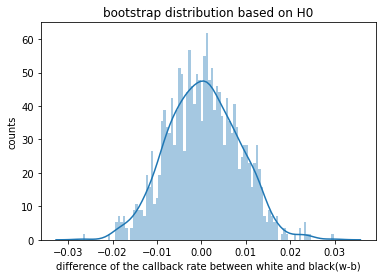

In [99]:
## plot the histogram of simulated call-back rate
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(syn_cb_diff, bins = 100)
plt.xlabel('difference of the callback rate between white and black(w-b)')
plt.ylabel('counts')
plt.title('bootstrap distribution based on H0')

In [98]:
# calculate margin of error
# find counts 97.5% to the right of mean (0)
syn_cb_diffary = np.array(syn_cb_diff)
sorted = np.sort(syn_cb_diffary)
ME = sorted[975]-0
print "Margin of Error by bootstrap:", ME

# confidence interval of 95%, two-tailed ,
print "Confidence interval of 95%, two-tailed, based on H0:", sorted[25],"to", 0+ME

#p-value of getting difference
print "observed differencee:", p_diff
print "p value by bootstrap:", sum(syn_cb_diffary >= p_diff)/1000

Margin of Error by bootstrap: 0.0155613036312
Confidence interval of 95%, two-tailed, based on H0: -0.0147960732719 to 0.0155613036312
observed differencee: 0.0320328542094
p value by bootstrap: 0


#### [ANS] According to the bootstrap result, p-value is much smaller than2.5%, so H0 should be rejected.

<div class="span5 alert alert-success">
<p> 4.Write a story describing the statistical significance in the context or the original problem. </p>
</div>

##### [ANS] The result of the survey states that the call-back rate for a white-sounding name is 9.65% while black-sounding name is 6.44%. The rate of call-back white gets is ~1.5 times more than black. We conducted a statistical hypothesis test to see if the the call-back rate is truely biased toward white-sounding name or the sampling of this result is due to random chance. With a confidence interval 95%,  we can conclude by z-statistic and bootstrap method that the call-back rate is truely not equal between white and black. The probability (or chance) of seeing this survey result, were it that the call-back rate is equal, is only .00039% or fairly close to 0.  Therefore, statistic suggests that the call-back rate is truely not equal between white and black candidates.  

<div class="span5 alert alert-success">
<p> 5.Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis? </p>
</div>

####  [ANS] We cannot conclude that the race/name is the most important factor affecting callback, because my analysis only consider the race/name factor but not others from the data. We can construct a machine learning model, take into account of all the factors and fit a model. Then, we can analyze/rank the effects of other factors based on a good model.